In [ ]:
!git clone https://gitlab.com/checkthat_lab/clef2025-checkthat-lab.git

Cloning into 'clef2025-checkthat-lab'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (835/835), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 856 (delta 406), reused 835 (delta 406), pack-reused 21 (from 1)
Receiving objects: 100% (856/856), 78.96 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (410/410), done.
Updating files: 100% (181/181), done.


In [ ]:
%cd clef2025-checkthat-lab/task2/data

/content/clef2025-checkthat-lab/task2/data


In [ ]:
import os
import re
import json

from matplotlib.ticker import PercentFormatter
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import numpy as np
import pandas as pd
import zipfile

pd.set_option('max_colwidth', 300)

In [ ]:
train_path = "train/train-por.csv"
dev_path = "dev/dev-por.csv"
test_path = "test/test-por.csv"

train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df.head()

,post,normalized claim
0,"Um homem de 50 anos está a jogar basketball na liga de adolescentes feminina, porque se identifica como uma jovem adolescente.\n\nA que ponto isto chegou!!! \nÉ bizarro! É doentio...🤢\n(É isso que dá viver na fantasia, no auto-engano e fora da realidade...)\n\nParabéns aos que apoiaram a ideolog...",Homem de 50 anos se identifica como jovem e joga em liga feminina adolescente de basquete
1,"Sem saber que estava sendo filmado, Klaus Schwab, presidente do Fórum Econômico Mundial, diz “Temos todos eles em nossos bolsos, políticos, mídia e, acima de tudo, os especialistas e cientistas”. https://t.co/K5wAFUjnBQ Sem saber que estava sendo filmado, Klaus Schwab, presidente do Fórum Econô...","Sem saber que estava sendo filmado, o presidente do Fórum Econômico Mundial, Klaus Schwab, disse ter políticos, mídia, especialistas e cientistas ""no bolso"""
2,"Carrefour fechou hoje em Porto Alegre, demitidos 783 pessoas. Agradeçam a Manuela D'Ávila.\nAgenda da comunistas aplicada com sucesso! Carrefour fechou hoje em Porto Alegre, demitidos 783 pessoas. Agradeçam a Manuela D'Ávila.\nAgenda da comunistas aplicada com sucesso! Carrefour fechou hoje em P...",Manuela D Ávila liderou protestos que levaram ao fechamento de Carrefour e demissão de funcionários
3,"Já viram? 2 policiais algemam 1 negro daí ele ""vocês tão me prendendo assumindo que sou algo que não sou"". Já viram? 2 policiais algemam 1 negro daí ele ""vocês tão me prendendo assumindo que sou algo que não sou"". Já viram? 2 policiais algemam 1 negro daí ele ""vocês tão me prendendo assumindo qu...",Policiais prendem homem negro e descobrem que ele é agente do FBI George Floyd
4,"Deputada federal do PSOL Talíria Petroni eleita pelos cariocas e fluminenses, afirmou em sessão na Câmara dos deputados que ""OS POLICIAIS NÃO FAZEM MAIS QUE OBRIGAÇÃO MORRER EM COMBATE CONTRA O CRIME ORGANIZADO, POIS ELES SÃO PAGOS PARA ISSO, MORRER""\nEste é o nível das pessoas que os cariocas t...",A deputada Talíria Petrone disse na Câmara dos Deputados que policiais são pagos para morrer


In [ ]:
dev_df.head()

,post,normalized claim
0,"Da página da Gilda Eliote \n\nA MÍDIA SOCIAL tirou sarro do vestido de Melania TRUMP na noite passada, dizendo que parecia q TRUMP rabiscou nele c/ um marcador. Só que é um vestido desenhado por Alexander McQueen, usando esboços desenhados por VÍTIMAS de abuso sexual infantil para descrever seu...","A primeira-dama dos Estados Unidos, Melania Trump, com um vestido de Alexander McQueen, usando esboços desenhados por vítimas de abuso sexual infantil."
1,Imprensa esquerdista esconde a mega manifestação contra as fraudes eleitorais nos Estados Unidos. Hoje 06/01/21 Divulgue!! Imprensa esquerdista esconde a mega manifestação contra as fraudes eleitorais nos Estados Unidos. Hoje 06/01/21 Divulgue!! Imprensa esquerdista esconde a mega manifestaçã...,"Estas fotos foram feitas em 6 de janeiro de 2021 em Washington, dia em que apoiadores de Trump invadiram o Capitólio"
2,Os amigos do Luladrão ficaram felizes com a decisão do ministro Fachin. #lula #luladrão #stf #stfvergonhanacional #STFvergonhaMundial #fachin #pt #PTnuncaMais Os amigos do Luladrão ficaram felizes com a decisão do ministro Fachin. #lula #luladrão #stf #stfvergonhanacional #STFvergonhaMundial #fa...,Presidiários comemoram decisão do ministro do STF Edson Fachin depois de ter anulado as condenações de Lula
3,"Caminhão que estava indo para Venezuela \nEm um “golpe de sorte” foi interceptado pela PRF, numa blitz.\n Depois de algumas perguntas para o motorista, como para onde ia vazio, este se mostrou muito nervoso. \nForam encontrados centenas de milhares de dólares onde o motorista confessou que foi c...",Vídeo mostra apreensão da PRF de dinheiro que saiu do Instituto Lula e tinha a Venezuela como destino
4,"Franceses fecham a porta do Parlamento com cimento., já que os deputados em lugar de representar o povo, servem aos globalistas.\nÉ uma boa ideia a ser implementada por aqui. Franceses fecham a porta do Parlamento com cimento., já que os deputados em lugar de representar o povo, servem aos globa...",Vídeo mostra manifestantes cimentando Parlamento francês.


In [ ]:
test_df.head()

,post
0,"E ai ministros do STF, estão satisfeitos? E ai ministros do STF, estão satisfeitos? E ai ministros do STF, estão satisfeitos? None"
1,ADIVINHA QUEM QUEBROU O BRASIL É SÓ VER QUE DEPOIS DO GOLPE COMEÇOU A RECESSÃO ADIVINHA QUEM QUEBROU O BRASIL É SÓ VER QUE DEPOIS DO GOLPE COMEÇOU A RECESSÃO ADIVINHA QUEM QUEBROU O BRASIL É SÓ VER QUE DEPOIS DO GOLPE COMEÇOU A RECESSÃO @PATOARREPENDIDO\nLaturs ALMA\nação 2555- $2-² 43\nAbril\nJ...
2,"Ops!\n\nEle demorou para entender...\n\nKkkkkkkkkkkkkk\n\nDemorou para os chocadores inventarem algo para corromper a verdade óbvia do vídeo, que está até no Twitter do Lula...\nVergonha alheia!! Ops!\n\nEle demorou para entender...\n\nKkkkkkkkkkkkkk\n\nDemorou para os chocadores inventarem alg..."
3,"Vala pena ler♥😰\nAVISO IMPORTANTE\n.\nOlá, sou Laila Ahmadi da China estudante da Faculdade\nde Ciências Médicas da Universidade de Zanjan.\nO vírus Corona ou COVD-19 chegará a qualquer país\nmais cedo ou mais tarde, e não há dúvida de que\nmuitos países não possuem nenhum kit ou equipamento\nde..."
4,19h:35(terça) - Tragédia no Líbano: \nDubai: Burj Khalifa em Dubai acende esta noite em apoio às vítimas da dupla explosão em Beirute.\nEgito: As pirâmides do Egito se iluminam hoje à noite em apoio às milhares de vítimas em Beirute.\n\n--> Líbano declara estado de emergência de duas semanas em...


In [ ]:
def remove_repetitions(text):
    if isinstance(text, str):
        text = re.sub(r'\s*None\s*$', '', text)

        words = text.split()

        for size in range(1, len(words) // 2 + 1):
            pattern = words[:size]
            repeats = len(words) // size

            if words[:size * repeats] == pattern * repeats:
                return " ".join(pattern)

    return text

In [ ]:
train_df['post'] = train_df['post'].apply(remove_repetitions)
dev_df['post'] = dev_df['post'].apply(remove_repetitions)
test_df['post'] = test_df['post'].apply(remove_repetitions)

train_cleaned_path = "train/train_cleaned.csv"
dev_cleaned_path = "dev/dev_cleaned.csv"
test_cleaned_path = "test/test_cleaned.csv"

train_df.to_csv(train_cleaned_path, index=False)
dev_df.to_csv(dev_cleaned_path, index=False)
test_df.to_csv(test_cleaned_path, index=False)

print("Corrected files saved successfully!")
print(f"Train: {train_cleaned_path}")
print(f"Dev: {dev_cleaned_path}")
print(f"Test: {test_cleaned_path}")

In [ ]:
train_lengths = train_df.map(lambda x: len(str(x).split()))
dev_lengths = dev_df.map(lambda x: len(str(x).split()))

In [ ]:
train_lengths.describe().round(1)

,post,normalized claim
count,1735.0,1735.0
mean,74.1,14.9
std,107.9,6.9
min,4.0,4.0
25%,22.0,10.0
50%,41.0,14.0
75%,76.0,17.0
max,1488.0,84.0


In [ ]:
dev_lengths.describe().round(1)

,post,normalized claim
count,223.0,223.0
mean,77.4,15.5
std,105.1,6.8
min,6.0,6.0
25%,22.0,11.5
50%,40.0,14.0
75%,78.5,18.0
max,635.0,64.0


In [ ]:
def count_none_occurrences(file_path):
    df = pd.read_csv(file_path)
    none_count = df['post'].astype(str).apply(lambda x: x.strip().lower().endswith('none')).sum()
    none_count /= df.shape[0]
    none_count *= 100
    none_count = round(none_count, 2)

    return none_count

train_none_count = count_none_occurrences(train_path)
dev_none_count = count_none_occurrences(dev_path)
test_none_count = count_none_occurrences(test_path)

print("Occurrences of 'None' at the end of the 'post' column:")
print(f"Train: {train_none_count}")
print(f"Dev: {dev_none_count}")
print(f"Test: {test_none_count}")

In [ ]:
def make_histogram(column):
  median = pd.concat([train_lengths[column], dev_lengths[column]]).median()
  fig = plt.figure(figsize=(4.5, 4.5))

  plt.ylabel("Percentage")
  plt.xlabel("Word count")
  matplotlib.rcParams.update({'font.size': 12})

  plt.plot()
  plt.hist(train_lengths[column], bins=30, alpha=0.7, label="Train", density=True)
  plt.hist(dev_lengths[column], bins=30, alpha=0.7, label="Dev", density=True)
  plt.axvline(median, color='k', linestyle='dashed', linewidth=1, label=f"Median = {median}")
  fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.legend()
  plt.tight_layout()
  plt.savefig(f"{column}.pdf")

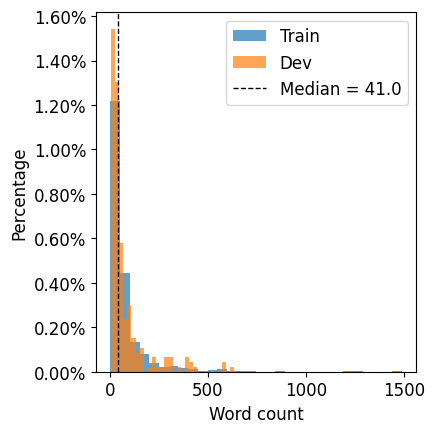

In [ ]:
make_histogram("post")
plt.show()

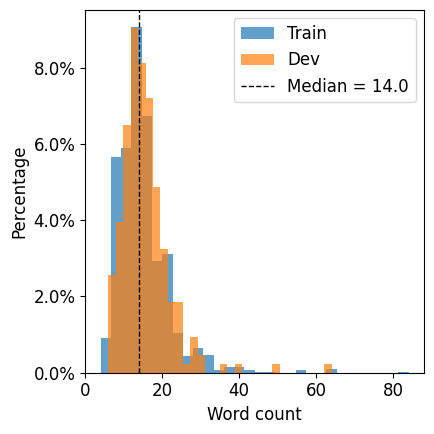

In [ ]:
make_histogram("normalized claim")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
bars = plt.bar(["Train", "Validation", "Test"], [len(train_df), len(dev_df), len(test_df)], color=["blue", "orange", "green"])
ax.bar_label(bars)
plt.ylabel("Number of Examples")
plt.title("Comparison of Number of Examples per Set")
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([
    train_df["post"].apply(lambda x: len(str(x).split())),
    train_df["normalized claim"].apply(lambda x: len(str(x).split())),
    dev_df["post"].apply(lambda x: len(str(x).split())),
    dev_df["normalized claim"].apply(lambda x: len(str(x).split()))
], labels=["Train - Post", "Train - Claim", "Validation - Post", "Validation - Claim"])

plt.ylabel("Number of Words")
plt.title("Distribution of Post and Claim Lengths")
plt.show()
